In [1]:
import pandas as pd
import numpy as np

In [3]:
diabetes_data=pd.read_csv("C:/Users/mananshah/Desktop/Manan/datasets_228_482_diabetes.csv")
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [14]:
len(diabetes_data.columns)

9

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026E0F170D68>,
      dtype=object)

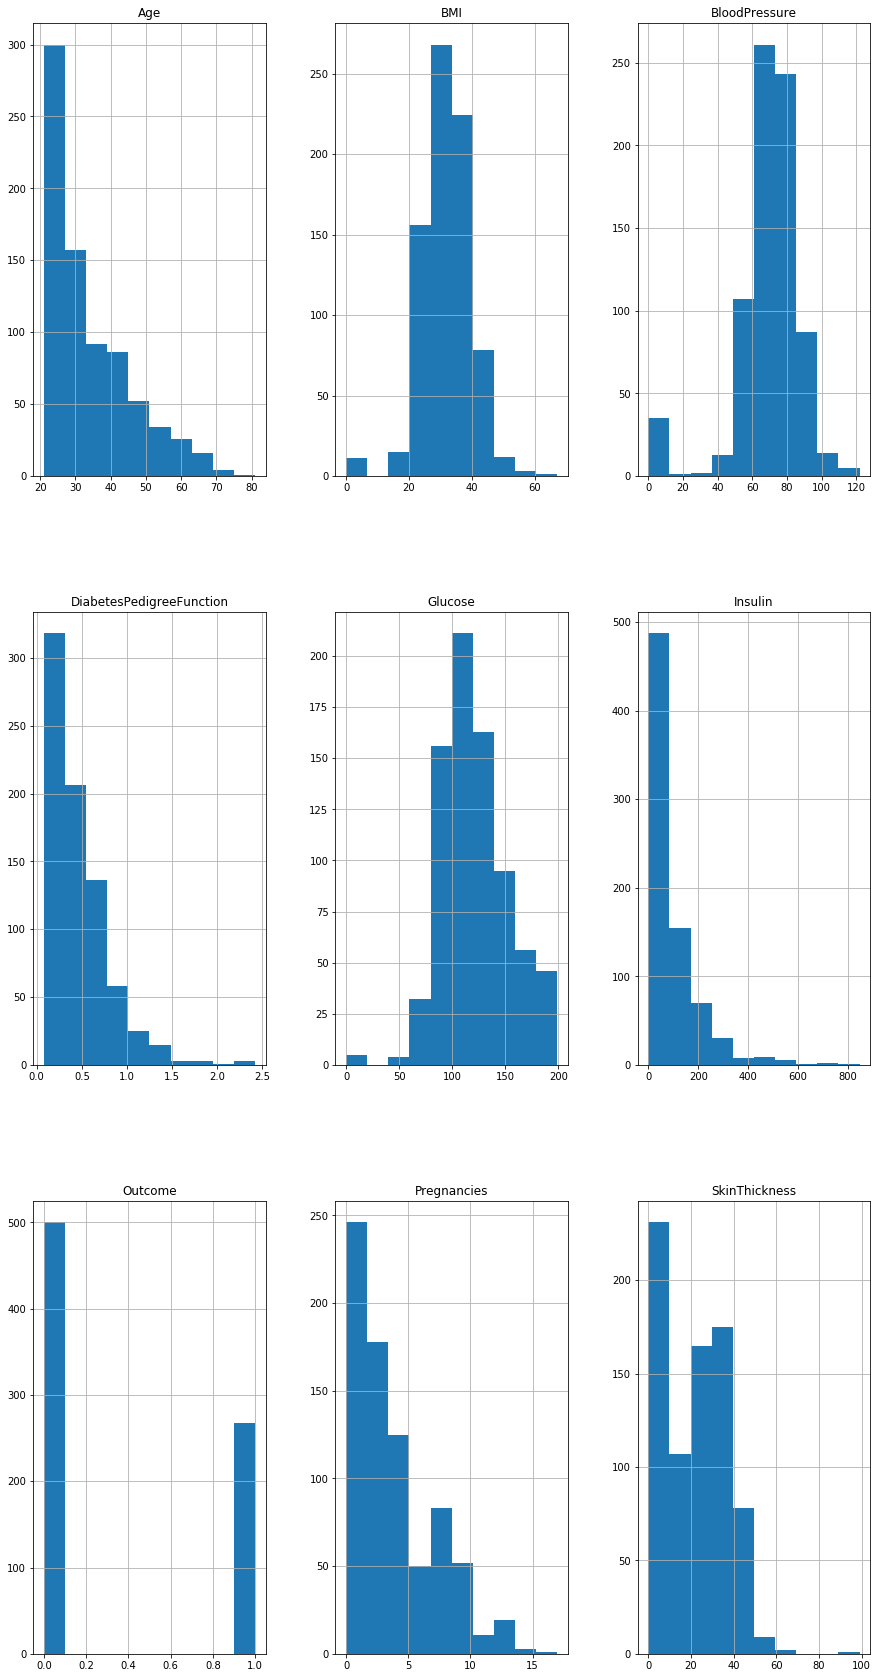

In [20]:
#for i in range(len(diabetes_data.columns)):
#        plt.hist(diabetes_data.iloc[i],bins=10)
diabetes_data.hist(bins=10,figsize=(15,30))    

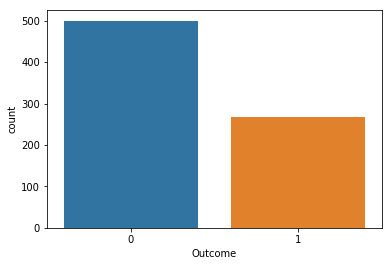

In [26]:
sns.countplot('Outcome',data=diabetes_data)

In [34]:
X=diabetes_data.iloc[:,0:7]
y=diabetes_data.Outcome

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [35]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_train_new=stdsc.fit_transform(X_train)
X_test_new=stdsc.fit_transform(X_test)


In [70]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
def print_score(clf,X_train_new,X_test_new,y_train,y_test,train):
    if train==True:
        pred=clf.predict(X_train_new)
        print("Train Result\n")
        print(f"accuracy score: {accuracy_score(y_train,pred)*100}\n")
        print(f"Classification Report:\nPrecison Score:{precision_score(y_train,pred)}\t\nF1 Score:{f1_score(y_train,pred)}\t\nRecall Score:{recall_score(y_train,pred)}\n")
        print(confusion_matrix(y_train,pred))
    elif train==False:
        
        pred=clf.predict(X_test_new)
        print("Test Result\n")
        print(f"accuracy score: {accuracy_score(y_test,pred)*100}\n" )
        print(f"Classification Report:\nPrecison Score:{precision_score(y_test,pred)}\t\nF1 Score:{f1_score(y_test,pred)}\t\nRecall Score:{recall_score(y_test,pred)}\n")
        print(confusion_matrix(y_test,pred))


In [71]:
#Bagging Techniques
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
blg=BaggingClassifier(base_estimator=tree,n_estimators=2000,random_state=1)
blg.fit(X_train_new,y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=2000, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [72]:
print_score(blg,X_train_new,X_test_new,y_train,y_train,train=True)

Train Result

accuracy score: 100.0

Classification Report:
Precison Score:1.0	
F1 Score:1.0	
Recall Score:1.0

[[401   0]
 [  0 213]]


In [73]:
print_score(blg,X_train_new,X_test_new,y_train,y_test,train=False)

Test Result

accuracy score: 78.57142857142857

Classification Report:
Precison Score:0.7391304347826086	
F1 Score:0.6732673267326733	
Recall Score:0.6181818181818182

[[87 12]
 [21 34]]


In [74]:
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier(n_estimators=1500,random_state=1)
rand.fit(X_train_new,y_train)
print_score(rand,X_train_new,X_test_new,y_train,y_test,train=True)
print_score(rand,X_train_new,X_test_new,y_train,y_test,train=False)


Train Result

accuracy score: 100.0

Classification Report:
Precison Score:1.0	
F1 Score:1.0	
Recall Score:1.0

[[401   0]
 [  0 213]]
Test Result

accuracy score: 76.62337662337663

Classification Report:
Precison Score:0.7111111111111111	
F1 Score:0.64	
Recall Score:0.5818181818181818

[[86 13]
 [23 32]]


In [75]:
#Boosting Techniques
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=2000)
ada.fit(X_train_new,y_train)
print_score(ada,X_train_new,X_test_new,y_train,y_test,train=True)
print_score(ada,X_train_new,X_test_new,y_train,y_test,train=False)

Train Result

accuracy score: 99.3485342019544

Classification Report:
Precison Score:1.0	
F1 Score:0.990521327014218	
Recall Score:0.9812206572769953

[[401   0]
 [  4 209]]
Test Result

accuracy score: 75.32467532467533

Classification Report:
Precison Score:0.6491228070175439	
F1 Score:0.6607142857142858	
Recall Score:0.6727272727272727

[[79 20]
 [18 37]]


In [76]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=1500,random_state=1)
grad.fit(X_train_new,y_train)
print_score(grad,X_train_new,X_test_new,y_train,y_test,train=True)
print_score(grad,X_train_new,X_test_new,y_train,y_test,train=False)

Train Result

accuracy score: 100.0

Classification Report:
Precison Score:1.0	
F1 Score:1.0	
Recall Score:1.0

[[401   0]
 [  0 213]]
Test Result

accuracy score: 73.37662337662337

Classification Report:
Precison Score:0.6346153846153846	
F1 Score:0.616822429906542	
Recall Score:0.6

[[80 19]
 [22 33]]
